# AppGPS Cleaning_Reviews
#### A Sentimental Analysis of App-Users from the category communication in the Google Play Store



### 1. Import Libraries and Dataset
### 2. Data Standardization and Exploration
### 3. Cleaning the Text
### 4. Processing the Text and Feature Engineering 
### 5. Save Lematized Data to .csv


### 1. Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import BASE_COLORS

%matplotlib inline


import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
# For perfomance tracking 
from tqdm.notebook import trange, tqdm


# For tokenazing the text with Python
import spacy
import en_core_web_sm
import nltk
# For Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer 


# For counting unique words
from collections import Counter

import warnings
warnings.filterwarnings('ignore')


In [2]:

df = pd.read_csv("GPL_app_review_df.csv") 

In [3]:
df.head(30) 

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEiwKoXvSZGRPvzQi15ctf4SZWtmy9dEBcidyN...,KHUSHBAKHT KHAN,https://play-lh.googleusercontent.com/a-/AOh14...,"Just got the update, and now chrome has just s...",1,881,89.0.4389.72,2021-03-05 10:53:50,NaN,NaN,most_relevant,com.android.chrome
1,gp:AOqpTOHecP-Fo5vrtM6NuzGCDgziBFomftGOEuxstgQ...,Corina Bianca Gonteanu,https://play-lh.googleusercontent.com/a-/AOh14...,"I used to love this, but the grouped tabs are ...",1,570,89.0.4389.72,2021-03-06 20:56:06,NaN,NaN,most_relevant,com.android.chrome
2,gp:AOqpTOF4vAlw-HNKL5xqhQOL6at6M0VFTUos-H4AS7q...,Cristhian Gertner,https://play-lh.googleusercontent.com/-HQJZsA_...,I was super happy with Chrome for Android.This...,1,31,89.0.4389.72,2021-03-05 19:19:02,NaN,NaN,most_relevant,com.android.chrome
3,gp:AOqpTOGEv5sB6uUvLUkgTZ49lJAr9e9bkLI2sV09Pf4...,Serene Malaeb,https://play-lh.googleusercontent.com/-51k9d4c...,When I enter google on my phone and enter a ce...,1,148,89.0.4389.72,2021-03-04 09:21:44,NaN,NaN,most_relevant,com.android.chrome
4,gp:AOqpTOHM3s69f1sJ1PQgon-NgwXWqILSCdS1Wv_6KRO...,Siddarth Rahul,https://play-lh.googleusercontent.com/-GIyFg2p...,The new update is total BS. The tab layout is ...,1,41,89.0.4389.72,2021-03-05 13:20:29,NaN,NaN,most_relevant,com.android.chrome
5,gp:AOqpTOFbR8il7seUjedQ1aFAmUXNdOZWJD8xbLveLXq...,Marcie Hampton,https://play-lh.googleusercontent.com/a-/AOh14...,Wow just wow. I have been using this app for y...,1,25,88.0.4324.181,2021-03-06 20:09:33,NaN,NaN,most_relevant,com.android.chrome
6,gp:AOqpTOGjyX-7Re3NcNQDS4hWlBSry71492oW_k4sRT-...,Alex Becerra,https://play-lh.googleusercontent.com/a-/AOh14...,Just got your update and Its still not working...,1,1232,89.0.4389.72,2021-03-03 00:32:35,NaN,NaN,most_relevant,com.android.chrome
7,gp:AOqpTOHAzFczlEjNwryj2841AhPInRD3NeQUPVhYarI...,Eliška Kováčová,https://play-lh.googleusercontent.com/-ESSfqQt...,I used to love Chrome but these last updates m...,1,13,89.0.4389.72,2021-03-06 07:43:25,NaN,NaN,most_relevant,com.android.chrome
8,gp:AOqpTOEGBMAmNA0MTDRFNJH4nVDI66Hvme-uI0amDpQ...,Jordan Koller,https://play-lh.googleusercontent.com/-7fUWdM1...,I have never had trouble with Chrome until the...,1,117,88.0.4324.181,2021-03-03 10:16:13,NaN,NaN,most_relevant,com.android.chrome
9,gp:AOqpTOFKIHWTrJgrphq0Kb_OofIThGYNDe8U39b34Az...,Michael D,https://play-lh.googleusercontent.com/-toVSdLM...,Only updated because previous version wasn't w...,1,35,88.0.4324.181,2021-03-05 02:56:02,NaN,NaN,most_relevant,com.android.chrome


In [9]:
df.shape

(59564, 12)

### 2. Data Standardization and Exploration

In [10]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'sortOrder', 'appId'],
      dtype='object')

In [11]:
# standardizing headers
df.columns = [title.lower() for title in df.columns]
df.columns

Index(['reviewid', 'username', 'userimage', 'content', 'score',
       'thumbsupcount', 'reviewcreatedversion', 'at', 'replycontent',
       'repliedat', 'sortorder', 'appid'],
      dtype='object')

In [12]:
# checking for null values 
df.isnull().sum()

reviewid                    0
username                    2
userimage                   0
content                     2
score                       0
thumbsupcount               0
reviewcreatedversion     8157
at                          0
replycontent            42567
repliedat               42567
sortorder                   0
appid                       0
dtype: int64

In [13]:
# Since we only wan tot concentrate in the reviews'text, we can drop unnecessary features
df = df.drop(columns = ['reviewid', 'username', 'userimage', 'reviewcreatedversion', 'replycontent', 'repliedat', 'sortorder'])
df.head()

,content,score,thumbsupcount,at,appid
0,"Just got the update, and now chrome has just s...",1,881,2021-03-05 10:53:50,com.android.chrome
1,"I used to love this, but the grouped tabs are ...",1,570,2021-03-06 20:56:06,com.android.chrome
2,I was super happy with Chrome for Android.This...,1,31,2021-03-05 19:19:02,com.android.chrome
3,When I enter google on my phone and enter a ce...,1,148,2021-03-04 09:21:44,com.android.chrome
4,The new update is total BS. The tab layout is ...,1,41,2021-03-05 13:20:29,com.android.chrome


In [14]:
# Second, Drop the 2 null values in the df

df.dropna(inplace=True)
df.isnull().sum()

content          0
score            0
thumbsupcount    0
at               0
appid            0
dtype: int64

#### Checking for duplicated reviews
There are duplicated reviews that related to the times a review was replied and when the user repeat the reviews to gain more visibility. We can drop them and keep the fist, which should have the actual **thumbsupcount** 
1. duplicated reviews in all df = 7197
2. unduplicated text in feature content after dropping duplicated in all df = 6251

In [15]:
# check for duplilcated reviews in all df

df.duplicated(keep ="first").sum() 
df.drop_duplicates(keep = 'first', inplace = True)
#for a prticular column
#dataframe.duplicated(subset = ‘column_name’, keep = {‘last’, ‘first’, ‘false’)

In [16]:
# check for duplilcated reviews in the feature content

df.duplicated(subset = "content", keep ="first").sum()
df.drop_duplicates(subset = "content", keep = 'first', inplace = True)

In [17]:
df.shape

(46114, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46114 entries, 0 to 59562
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        46114 non-null  object
 1   score          46114 non-null  int64 
 2   thumbsupcount  46114 non-null  int64 
 3   at             46114 non-null  object
 4   appid          46114 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.1+ MB


#### Preliminary Visualzation of the data

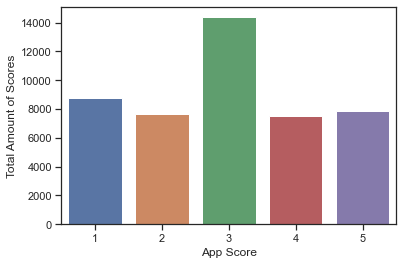

In [19]:
# Visualization of data after dropping duplicated values to see if the data is imbalanced

sns.countplot('score', data=df)
plt.ylabel('Total Amount of Scores')
plt.xlabel('App Score')
plt.show();

In [20]:
def df_hist(df):
    """
    docs
    """
    sns.set(rc={'figure.figsize':(10,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col], color = list(BASE_COLORS.keys())[i])
        
    plt.show()

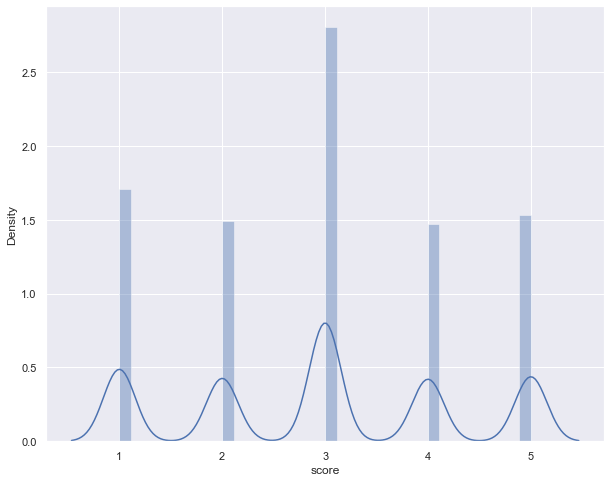

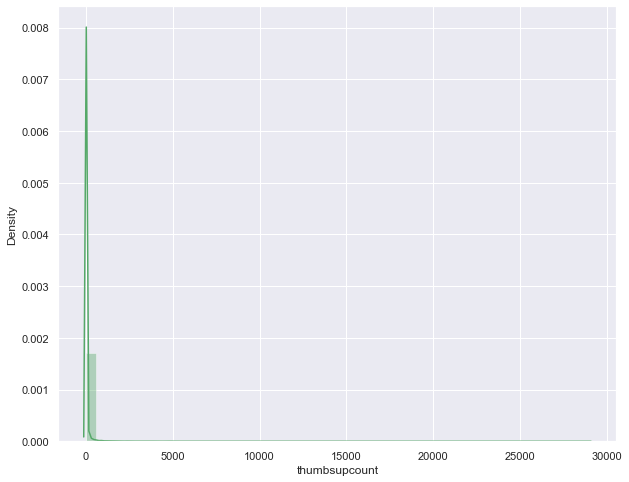

In [21]:
df_hist(df[["score", "thumbsupcount"]])

In [22]:
df["score"].value_counts()

3    14367
1     8738
5     7836
2     7637
4     7536
Name: score, dtype: int64

In [23]:
print (f" Bad score (1 and 2): {8738 +  7637}")
print(f" Good score (4 and 5): {7536 + 7836}")
print(" Neutral score 3:       14367")

 Bad score (1 and 2): 16375
 Good score (4 and 5): 15372
 Neutral score 3:       14367


In [24]:
df["thumbsupcount"].value_counts()

0       25352
1        4551
2        2261
3        1523
4        1071
        ...  
1221        1
1125        1
1093        1
997         1
3902        1
Name: thumbsupcount, Length: 1109, dtype: int64

#### **Preliminary Conclusions** 
1. There is a difference of around 2000 values between the neutral and the bad score, likewise there is a difference of 1000 values between the good score and bad score. We should have to consider this kind of imbalance for the future when training the model. Perhaps we eill need to train the model only with the data belonging to the good and the bad scores 

2. the score of thumps up is very imbalanced!! Should we keep it?

### 3. Cleaning the Text

In [56]:
# Perliminary exploration of the reviews
# Example 1 with emoji nd repeated symbols 
df["content"][7001]

'Easy to Use!!!! I like that it already separates junk/spam emails so I do not have to sift through what is legitimate and what is important!!! I like the app because it is simple to navigate as well!!!!!😘'

In [57]:
# Perliminary exploration of the reviews
# Example 2
df["content"][42301]

'There is to many naked old men Please do something about this'

In [25]:
# copy only the review colums
reviews = df.copy()
reviews.head()

,content,score,thumbsupcount,at,appid
0,"Just got the update, and now chrome has just s...",1,881,2021-03-05 10:53:50,com.android.chrome
1,"I used to love this, but the grouped tabs are ...",1,570,2021-03-06 20:56:06,com.android.chrome
2,I was super happy with Chrome for Android.This...,1,31,2021-03-05 19:19:02,com.android.chrome
3,When I enter google on my phone and enter a ce...,1,148,2021-03-04 09:21:44,com.android.chrome
4,The new update is total BS. The tab layout is ...,1,41,2021-03-05 13:20:29,com.android.chrome


In [26]:
reviews_df = reviews["content"]
reviews_df = pd.DataFrame(reviews_df)
reviews_df 

,content
0,"Just got the update, and now chrome has just s..."
1,"I used to love this, but the grouped tabs are ..."
2,I was super happy with Chrome for Android.This...
3,When I enter google on my phone and enter a ce...
4,The new update is total BS. The tab layout is ...
...,...
59557,It's too good
59558,Good fun
59559,Noyon
59560,Nice free app


#### Text Cleaning Approach  
* replace / and _ for " "
* delete:
  * punctuation
  * non alphanumeric values
  * emoticons
  * change contraction for the proper words
  * Remove numbers and words wth numbers.
  * change to lowercase

``` Python
"examle of regex"
x = " Its a good app, but the fact that they took out the nickname feature and editing photos/videos feature i give it 4 stars"
res_str = re.sub("/"," ",x)
res_str
```


In [27]:
# replace "/" and _ for " " to separate words

reviews_df["content"]=reviews_df["content"].apply(lambda x: re.sub("/"," ",x))

In [28]:
# change contraction for the proper words
# Dictionary of English Contractions
# source of ditionary: https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
reviews_df["content"]=reviews_df["content"].apply(lambda x:expand_contractions(x))

In [29]:
# Reviews in Lowercase
reviews_df["content"]=reviews_df["content"].apply(lambda x: x.lower())

In [30]:
# delete numbers and words with numbers
reviews_df["content"]=reviews_df["content"].apply(lambda x: re.sub("\w*\d\w*"," ",x))

In [31]:
# delete puntuation
reviews_df["content"]=reviews_df["content"].apply(lambda x: re.sub("[%s]" % re.escape(string.punctuation), " ",x))

In [32]:
# delete emoticons
reviews_df["content"]=reviews_df["content"].apply(lambda x: x.encode('ascii', 'ignore').decode())

In [33]:
# delete additional spaces generated during the data cleaning 
reviews_df["content"]=reviews_df["content"].apply(lambda x: re.sub(" +"," ",x))

In [34]:
# checking the cleaned data text in an aleatory set of reviews
for index,text in enumerate(reviews_df ['content'][6999:7025]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 everything is ok but at the last update they removed nicknames for groups and friends i really liked the nicknames on groups please add them back
Review 2:
 easy to use and very useful however sometimes message notifications did not appear at all 
Review 3:
 when i updated my messenger it was doing fine at first but a few days later my messages become to dissapear plss fix this
Review 4:
 it was pretty good but sometimes i cannot open it even if i have a nice internet connection afterall it was very useful 
Review 5:
 i miss the messenger heads mine refuses to show up frequent problem when you update your phone but otherwise pretty good 
Review 6:
 just like facebook but messenger is for chating with people so messenger text an video chat for free so this is great and beautiful it is a fact when its christmast the send photos for us this is my review
Review 7:
 i live in a very rural area att mobile service cannot even provide service to this river area textnow is able to 
R

In [35]:
# save the cleaned column in csv 
reviews_df.to_csv("clean_reviews_df.csv", index=None, header=True) 

In [36]:
# concatenate the columns and save all the cleaned data in csv 
reviews = reviews.drop(columns=["content"])
total_clean_reviews= pd.concat([reviews, reviews_df], axis=1)
total_clean_reviews.to_csv("cleaned_all_data_reviews.csv", index=None, header=True) 


In [70]:
total_clean_reviews.head(2)

,score,thumbsupcount,at,appid,content
0,1,881,2021-03-05 10:53:50,com.android.chrome,just got the update and now chrome has just st...
1,1,570,2021-03-06 20:56:06,com.android.chrome,i used to love this but the grouped tabs are i...


In [37]:
# copy the cleaned data to easy deal with the name
data = total_clean_reviews.copy()
data["content"].head()

0    just got the update and now chrome has just st...
1    i used to love this but the grouped tabs are i...
2    i was super happy with chrome for android this...
3    when i enter google on my phone and enter a ce...
4    the new update is total bs the tab layout is t...
Name: content, dtype: object


### 4. Processing the Text and Feature Engineering 

#### Delete stopwords and tokenize the words in the reviews 
for this I use: https://spacy.io/
source: https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

In [38]:
# Importing spacy
import spacy
import en_core_web_sm

# Loading model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])


In [39]:

# Lemmatization with stopwords removal
data['lemmatized']=data['content'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [40]:
data['lemmatized'].head()

0    get update chrome stop work reason try clear c...
1    love group tab illogical add extra click want ...
2    super happy chrome android change immediately ...
3    enter google phone enter certain site switch g...
4    new update total bs tab layout totally mess ch...
Name: lemmatized, dtype: object

In [41]:
data.head()

,score,thumbsupcount,at,appid,content,lemmatized
0,1,881,2021-03-05 10:53:50,com.android.chrome,just got the update and now chrome has just st...,get update chrome stop work reason try clear c...
1,1,570,2021-03-06 20:56:06,com.android.chrome,i used to love this but the grouped tabs are i...,love group tab illogical add extra click want ...
2,1,31,2021-03-05 19:19:02,com.android.chrome,i was super happy with chrome for android this...,super happy chrome android change immediately ...
3,1,148,2021-03-04 09:21:44,com.android.chrome,when i enter google on my phone and enter a ce...,enter google phone enter certain site switch g...
4,1,41,2021-03-05 13:20:29,com.android.chrome,the new update is total bs the tab layout is t...,new update total bs tab layout totally mess ch...


### 5. Save Lematized Data to .csv

In [42]:
# save lematized data for future uses
data.to_csv("lematized_data.csv", index=None, header=True) 

If questions check the backup and notebook of final project!!!